# Pymaceuticals Inc.
---

### Analysis

Mice treated with Capomulin and Ramicane had the smallest tumor volume at their max timepoint, indicating that they were the most effective drugs. There was a correlation between mouse weight and how large their tumors grew on Capomulin. Over time, the mouse (1509) treated with Capomulin had significant tumor decrease, but it was not a steady decline, with slight upturns near the end of treatment. 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicated_rows = mouse_study[duplicates]
duplicated_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mouse = mouse_study.drop_duplicates()
unique_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mouse["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor = unique_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = unique_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = unique_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev_tumor = unique_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = unique_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_table = pd.DataFrame({"Mean Tumor Volume": mean_tumor, "Median Tumor Volume": median_tumor, 
                           "Tumor Volume Variance": variance_tumor, "Tumor Volume Std. Dev.": standard_dev_tumor,
                           "Tumor Volume Std. Err.": sem_tumor})
drug_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
other_drug_table = unique_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
other_drug_table


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
#set graph variable for pandas
graph1 = unique_mouse.groupby("Drug Regimen")["Timepoint"].count()

## Bar and Pie Charts

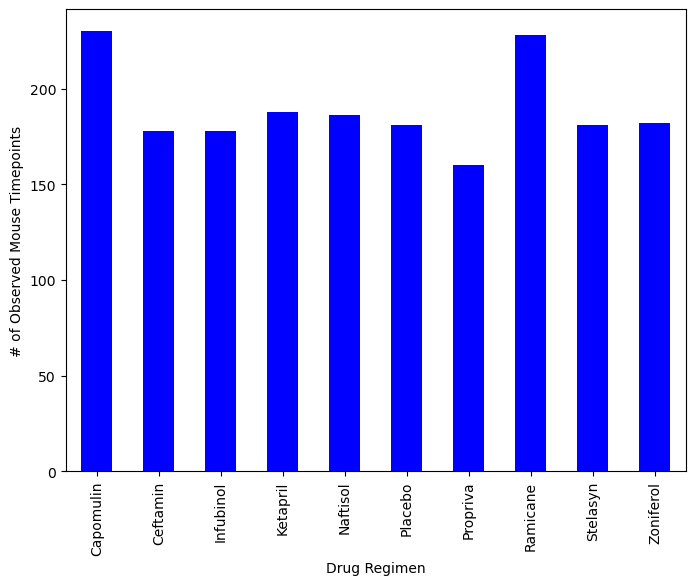

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

graph1.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                title="",
                                xlabel="Drug Regimen",
                                ylabel="# of Observed Mouse Timepoints")
xticklabels = graph1.index
plt.show()

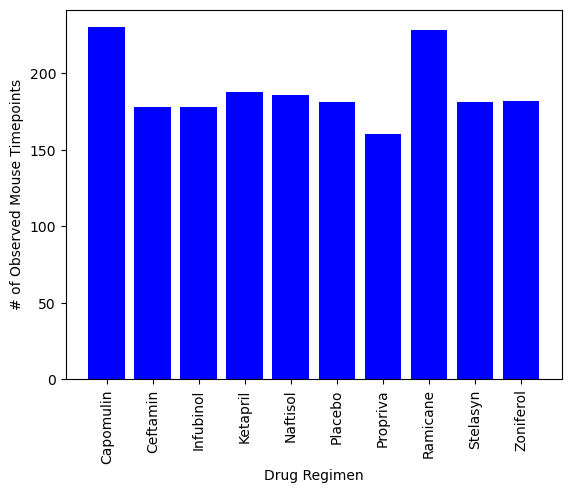

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(graph1.index, graph1.values, color="blue")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [13]:
#group the mice by sex
mouse_sex = unique_mouse.groupby("Sex")["Mouse ID"].count()
mouse_sex

Sex
Female    934
Male      958
Name: Mouse ID, dtype: int64

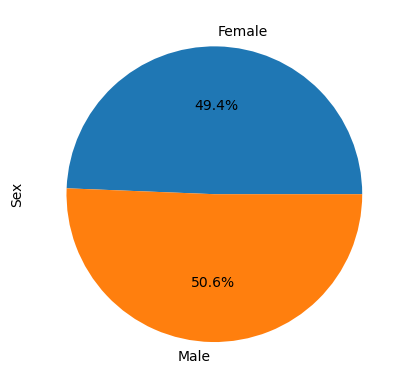

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_graph = mouse_sex.plot(kind="pie", y="Sex", autopct='%1.1f%%')
pie_graph.set_ylabel("Sex")
plt.show()

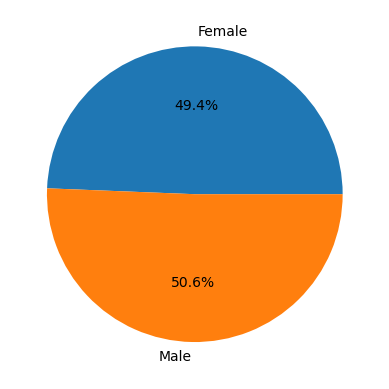

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode=[0,0]
plt.pie(mouse_sex, explode=explode, labels=mouse_sex.index,
        autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_timepoint = unique_mouse.groupby("Mouse ID")["Timepoint"].max().reset_index()
max_timepoint

# Start by getting the last (greatest) timepoint for each mouse
max_mouse = pd.merge(unique_mouse, max_timepoint, on=["Timepoint", "Mouse ID"])
max_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [94]:
 # Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

#A for loop is used to display the interquartile range (IQR) and the outliers for each treatment group
#Determine outliers using upper and lower bounds
for regimen in regimens:
    tumor_value = max_mouse.loc[max_mouse["Drug Regimen"] == regimen,"Tumor Volume (mm3)"]
    tumor_volume.append(tumor_value)
    quartiles = tumor_value.quantile([0.25,0.5,0.75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_value[(tumor_value < lower_bound) | (tumor_value > upper_bound)]
    print(f"{regimen}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


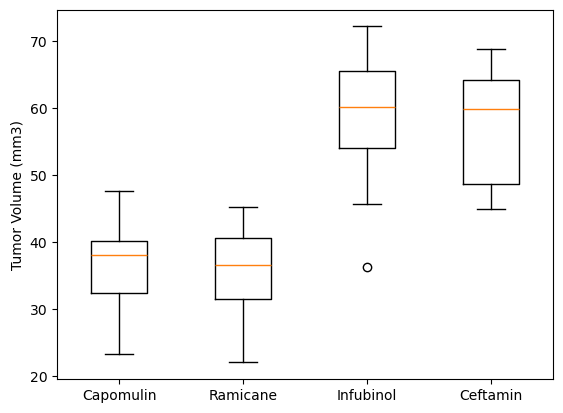

In [95]:
# Extract tumor volumes for each regimen from the results dictionary
plt.ylabel("Tumor Volume (mm3)")
plt.boxplot(tumor_volume, labels=regimens)
plt.show()

In [101]:
#set dataframes for line graph and scatter plots
cap_df = unique_mouse.loc[unique_mouse["Drug Regimen"] == "Capomulin"]
cap_plot = unique_mouse.loc[unique_mouse["Mouse ID"] == "l509",:]

## Line and Scatter Plots

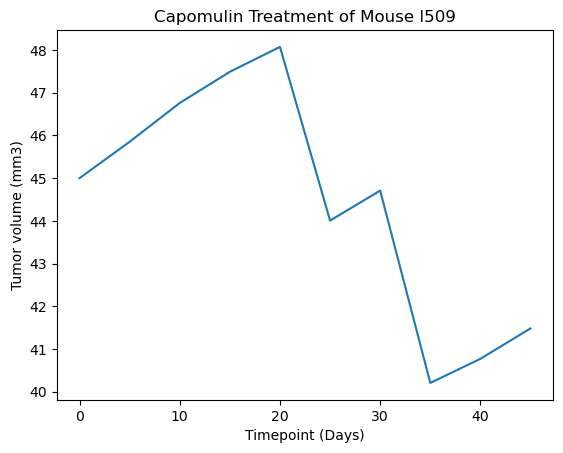

In [103]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = cap_plot["Timepoint"]
y_axis = cap_plot["Tumor Volume (mm3)"]
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.plot(x_axis, y_axis)
plt.show()

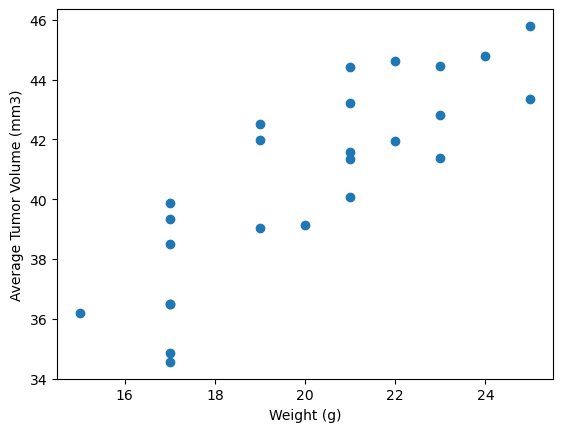

In [116]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
s_x_axis = cap_df.groupby("Mouse ID")["Weight (g)"].mean()
s_y_axis = cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(s_x_axis, s_y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


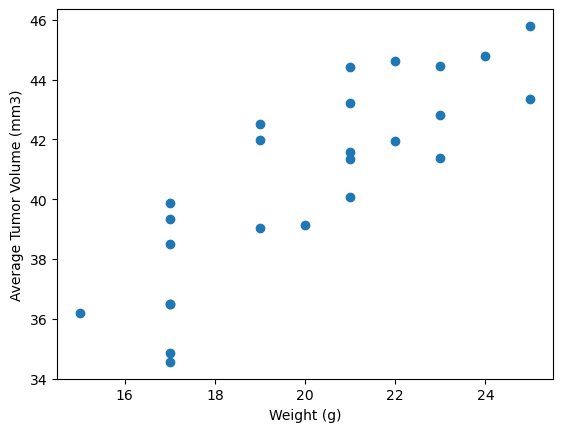

In [119]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
s_x_axis = cap_df.groupby("Mouse ID")["Weight (g)"].mean()
s_y_axis = cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
correlation = st.pearsonr(s_x_axis, s_y_axis)
plt.scatter(s_x_axis, s_y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.show()

In [120]:
#calculate the line regression
line_regress=st.linregress(s_x_axis, s_y_axis)
line_regress

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [121]:
#assign variables to data from line regression calculation
slope = 0.9544396890241049
intercept = 21.552160532685008

## Correlation and Regression

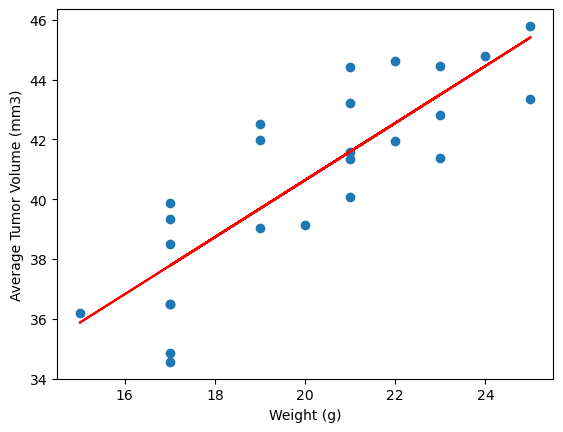

In [123]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
y_line = s_x_axis * slope + intercept
s_x_axis = cap_df.groupby("Mouse ID")["Weight (g)"].mean()
s_y_axis = cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
correlation = st.pearsonr(s_x_axis, s_y_axis)
plt.scatter(s_x_axis, s_y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(s_x_axis, y_line, color="red")
plt.show()